In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

The dataset has 8 features that contains
gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course, reading_score, writing_score

Dependent: math_score

## Dataset checks
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**Insights**: The dataset has no missing values

In [5]:
df.duplicated().sum()

np.int64(0)

**Insights**: The dataset has no duplicates values

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [7]:
numerical_features = list(df.select_dtypes(exclude='object').columns)
categorical_features = list(df.select_dtypes(include='str').columns)

print(f'The dataset has {len(numerical_features)} numerical features. Numerical features: {numerical_features}') # type: ignore
print(f'The dataset has {len(categorical_features)} categorical features. Categorical features: {categorical_features}')

The dataset has 3 numerical features. Numerical features: ['math_score', 'reading_score', 'writing_score']
The dataset has 5 categorical features. Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**: All the data are belo|nged in similiar range. The mean range is 60-70.

In [10]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
gender = df['gender'].unique()
print('The gender has {0} and values are: {1}'.format(len(gender), list(gender)))

race = df['race_ethnicity'].unique()
print(f'The race_ethnicity field has {len(race)} and values are: {list(race)}')

parental = df['parental_level_of_education'].unique()
print(f'The parental_level_of_education field has {len(parental)} and values are: {list(parental)}')

lunch = df['lunch'].unique()
print(f'The lunch field has {len(lunch)} and values are: {list(lunch)}')

test = df['test_preparation_course'].unique()
print(f'The test_preparation_course field has {len(test)} and values are: {list(test)}')

The gender has 2 and values are: ['female', 'male']
The race_ethnicity field has 5 and values are: ['group B', 'group C', 'group A', 'group D', 'group E']
The parental_level_of_education field has 6 and values are: ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
The lunch field has 2 and values are: ['standard', 'free/reduced']
The test_preparation_course field has 2 and values are: ['none', 'completed']


### Adding columns of total_score and average score

In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [16]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [25]:
## Highest mark obtained
math_full = df[df['math_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()

print(f'{math_full} students obtained full mark on math.')
print(f'{reading_full} students obtained full mark on reading.')
print(f'{writing_full} students obtained full mark on writing.')

7 students obtained full mark on math.
17 students obtained full mark on reading.
14 students obtained full mark on writing.


In [26]:
## Lowest mark observations
math_less20 = df[df['math_score'] <= 20]['average'].count()
reading_less20 = df[df['reading_score'] <= 20]['average'].count()
writing_less20 = df[df['writing_score'] <= 20]['average'].count()

print(f'{math_less20} students got mark on math less than 20.')
print(f'{reading_less20} students got mark on reading less than 20.')
print(f'{writing_less20} students got mark on writing less than 20.')

4 students got mark on math less than 20.
1 students got mark on reading less than 20.
3 students got mark on writing less than 20.


#### Insights:
- Most of the students suffered in the math
- They well on reading section

## Visualize the data

In [27]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


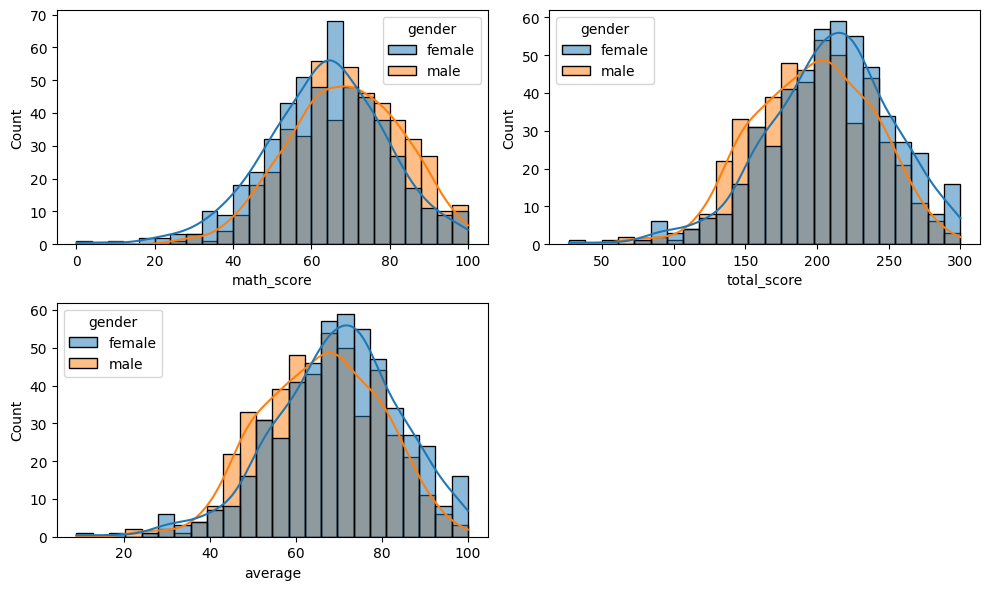

In [34]:
## Relation between gender and obtained mark on math, total, and average

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='math_score', hue='gender', kde=True)

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='total_score', hue='gender', kde=True)

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='average', hue='gender', kde=True)

plt.tight_layout()
plt.show()

#### Insights:
- Female students had better performance than male.